In [1]:
# Plot in vivo spectrum data from the Shimadzu UV-1800
# Jackson M. Tsuji, 2022

In [2]:
import pandas as pd
from plotnine import *

In [3]:
def read_shimadzu_csv_spectra(filepath, sample_name, normalize_chlorosome=False, start_nm=None, end_nm=None, multiplier=1, offset=0):
    
    spectrum_data = pd.read_csv(filepath, sep=',', skiprows=1)\
      .rename(columns={'WL/nm': 'Wavelength (nm)', 'Abs':'Absorbance'})
    
    spectrum_data['Sample'] = sample_name
    
    if normalize_chlorosome is True:
        spectrum_data_chlorosome = spectrum_data[(spectrum_data['Wavelength (nm)'] > 700) & (spectrum_data['Wavelength (nm)'] < 800)]
        chlorosome_peak_height = spectrum_data_chlorosome['Absorbance'].max()
        chlorosome_peak_location = spectrum_data_chlorosome[spectrum_data_chlorosome['Absorbance'] == chlorosome_peak_height]['Wavelength (nm)'].to_list()[0]
        
        print('Normalizing sample "' + sample_name + '" to chlorosome peak height ' + str(chlorosome_peak_height) + ' at wavelength ' + str(chlorosome_peak_location))
        spectrum_data['Absorbance'] = spectrum_data['Absorbance'] / chlorosome_peak_height
    
    if start_nm is not None:
        spectrum_data = spectrum_data[spectrum_data['Wavelength (nm)'] >= start_nm]
    
    if end_nm is not None:
        spectrum_data = spectrum_data[spectrum_data['Wavelength (nm)'] <= end_nm]
    
    spectrum_data['Absorbance'] = spectrum_data['Absorbance'] * multiplier + offset
    
    return(spectrum_data)

In [4]:
# Load
spectrum_cferro = read_shimadzu_csv_spectra('input/Chl-ferrooxidans-in-vivo-raw.csv', 'Chl. ferrooxidans', 
                                            normalize_chlorosome=True, start_nm=310, end_nm=1000)
spectrum_caur = read_shimadzu_csv_spectra('input/Cfx-aurantiacus-in-vivo-raw.csv', 'Cfx. aurantiacus', 
                                          normalize_chlorosome=True, start_nm=310, end_nm=1000)
spectrum_callo = read_shimadzu_csv_spectra('input/Ca-Chx-allophototropha-L227-S17-in-vivo-raw.csv', 'Ca. Chx. allophototropha', 
                                           normalize_chlorosome=True, start_nm=310, end_nm=1000)

# Combine
spectrum_data = pd.concat([spectrum_caur, spectrum_cferro, spectrum_callo])

spectrum_data

Normalizing sample "Chl. ferrooxidans" to chlorosome peak height 0.907 at wavelength 752.0
Normalizing sample "Cfx. aurantiacus" to chlorosome peak height 0.748 at wavelength 741.0
Normalizing sample "Ca. Chx. allophototropha" to chlorosome peak height 0.465 at wavelength 750.0


,Wavelength (nm),Absorbance,Sample
100,1000.0,0.002674,Cfx. aurantiacus
101,999.0,0.002674,Cfx. aurantiacus
102,998.0,0.002674,Cfx. aurantiacus
103,997.0,0.002674,Cfx. aurantiacus
104,996.0,0.002674,Cfx. aurantiacus
...,...,...,...
786,314.0,1.167742,Ca. Chx. allophototropha
787,313.0,1.169892,Ca. Chx. allophototropha
788,312.0,1.174194,Ca. Chx. allophototropha
789,311.0,1.178495,Ca. Chx. allophototropha


/Users/jmtsuji/miniconda3/envs/jupyterlab/lib/python3.12/site-packages/plotnine/utils.py:1231: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/jmtsuji/miniconda3/envs/jupyterlab/lib/python3.12/site-packages/plotnine/utils.py:317: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


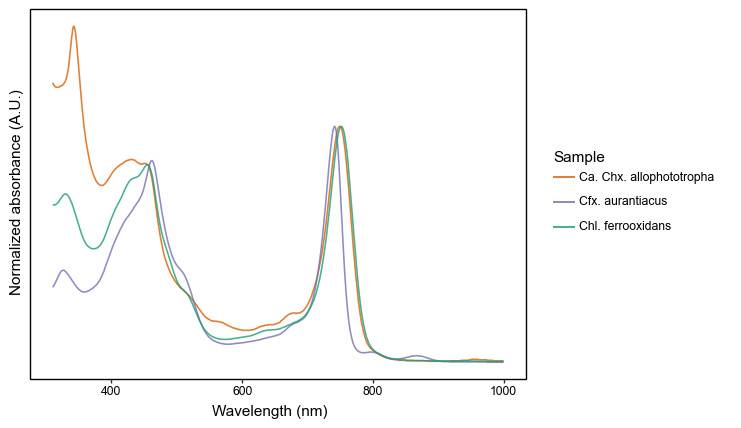

<ggplot: (383690441)>

In [5]:
spectrum_plot = (ggplot(spectrum_data, aes(x='Wavelength (nm)', y='Absorbance'))
                + geom_path(aes(group='Sample', colour='Sample'), size=0.65, alpha=0.8)
                + scale_colour_manual(values=['#d95f02','#7570b3','#1b9e77'])
                + theme_bw()
                + theme(panel_grid=element_blank(),
                       text=element_text(colour='black', family='Arial'),
                       panel_border=element_rect(colour='black'),
                       axis_text_y=element_blank(),
                       axis_ticks_major_y=element_blank(),
                       legend_key=element_blank())
                + ylab('Normalized absorbance (A.U.)')
                )

spectrum_plot

In [6]:
spectrum_plot.save('in_vivo_spectra.pdf', width=100, height=55, units='mm', verbose=False)

/Users/jmtsuji/miniconda3/envs/jupyterlab/lib/python3.12/site-packages/plotnine/utils.py:1231: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/jmtsuji/miniconda3/envs/jupyterlab/lib/python3.12/site-packages/plotnine/utils.py:317: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


/Users/jmtsuji/miniconda3/envs/jupyterlab/lib/python3.12/site-packages/plotnine/utils.py:1231: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/jmtsuji/miniconda3/envs/jupyterlab/lib/python3.12/site-packages/plotnine/utils.py:317: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/jmtsuji/miniconda3/envs/jupyterlab/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 25 rows containing missing values.


Normalizing sample "Chl. ferrooxidans" to chlorosome peak height 0.907 at wavelength 752.0
Normalizing sample "Cfx. aurantiacus" to chlorosome peak height 0.748 at wavelength 741.0
Normalizing sample "Ca. Chx. allophototropha" to chlorosome peak height 0.465 at wavelength 750.0


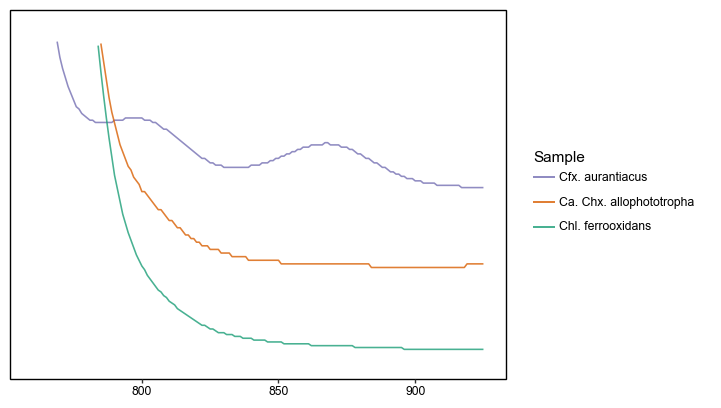

<ggplot: (385649708)>

In [7]:
### Inset panel
# Load
spectrum_cferro_subset = read_shimadzu_csv_spectra('input/Chl-ferrooxidans-in-vivo-raw.csv', 'Chl. ferrooxidans', 
                                                   normalize_chlorosome=True, start_nm=760, end_nm=925, offset=0)
spectrum_caur_subset = read_shimadzu_csv_spectra('input/Cfx-aurantiacus-in-vivo-raw.csv', 'Cfx. aurantiacus', 
                                                 normalize_chlorosome=True, start_nm=760, end_nm=925, offset=0.1)
spectrum_callo_subset = read_shimadzu_csv_spectra('input/Ca-Chx-allophototropha-L227-S17-in-vivo-raw.csv', 'Ca. Chx. allophototropha', 
                                                  normalize_chlorosome=True, start_nm=760, end_nm=925, offset=0.05)

# Combine
spectrum_data_subset = pd.concat([spectrum_caur_subset, spectrum_cferro_subset, spectrum_callo_subset])

spectrum_data_subset['Sample'] = pd.Categorical(spectrum_data_subset['Sample'], 
                                                categories=['Cfx. aurantiacus', 'Ca. Chx. allophototropha', 'Chl. ferrooxidans'], 
                                                ordered=True)

spectrum_plot_subset = (ggplot(spectrum_data_subset, aes(x='Wavelength (nm)', y='Absorbance'))
                + geom_path(aes(group='Sample', colour='Sample'), size=0.65, alpha=0.8)
                + scale_colour_manual(values=['#7570b3','#d95f02','#1b9e77'])
                + theme_bw()
                + theme(panel_grid=element_blank(),
                       text=element_text(colour='black', family='Arial'),
                       panel_border=element_rect(colour='black'),
                       axis_text_y=element_blank(),
                       axis_ticks_major_y=element_blank(),
                       legend_key=element_blank(),
                       axis_title=element_blank())
                + ylab('Normalized absorbance (A.U.)')
                + ylim(0, 0.2)
                )

spectrum_plot_subset

In [8]:
spectrum_plot_subset.save('in_vivo_spectra_subset.pdf', width=30, height=20, units='mm', verbose=False)

/Users/jmtsuji/miniconda3/envs/jupyterlab/lib/python3.12/site-packages/plotnine/utils.py:1231: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/jmtsuji/miniconda3/envs/jupyterlab/lib/python3.12/site-packages/plotnine/utils.py:317: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/jmtsuji/miniconda3/envs/jupyterlab/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 25 rows containing missing values.
